## Solar system simulator

Some rough working code 

In [1]:
import numpy as np
from scipy import integrate 
import matplotlib.pyplot as plt 
import scipy.integrate as integrate 
from scipy.integrate import quad 
import scipy.special as special 

New structure:

- File with constants
- File with fundamental equations (Newton 2, Kepler velocity, ...)
- File with planetary positions (where to get values though...)
- File with code from above 
- File with plotting functions
- Jupyter notebook to test 


Make a folder for rough files. Make a .gitignore to block upload of the folder. 


Extend to have different diff eq. solvers, and an analysis of the energy (as well as other things)


Extend to 3D code with 3D viewing. 

In [4]:
import System2D 

In [5]:
np.random.rand(3)

array([0.134571  , 0.77336357, 0.41939965])

In [6]:
sun = System2D.Body(mass=1.989e30, position=np.array([0.0, 0.0]), velocity=np.array([0.0, 0.0]), name="Sun")
earth = System2D.Body(mass=5.972e24, position=np.array([1.496e11, 0.0]), velocity=np.array([0.0, 29783.0]), name="Earth")
mars = System2D.Body(mass=6.39e23, position=np.array([2.279e11, 0.0]), velocity=np.array([0.0, 24077.0]), name="Mars")

bodies_list = [sun, earth, mars]

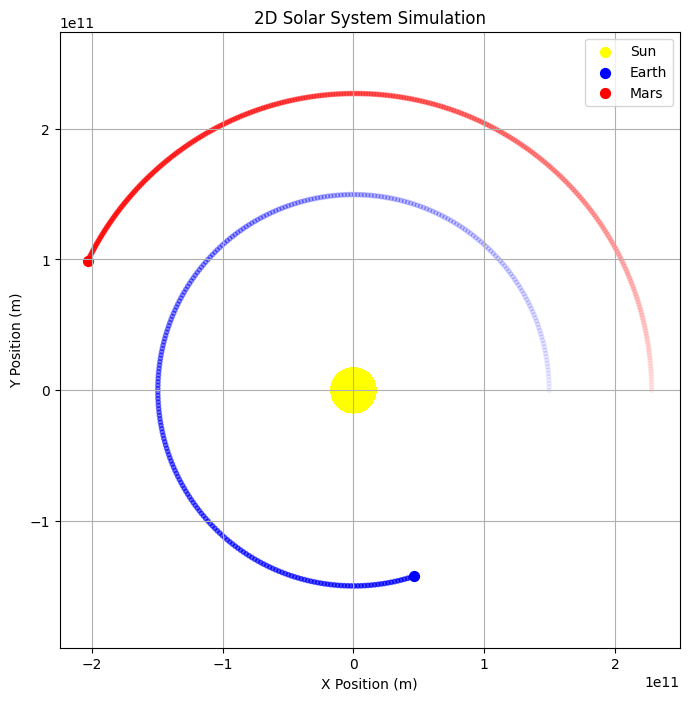

In [7]:
System2D.run_simulation(bodies = bodies_list, years = 0.8)

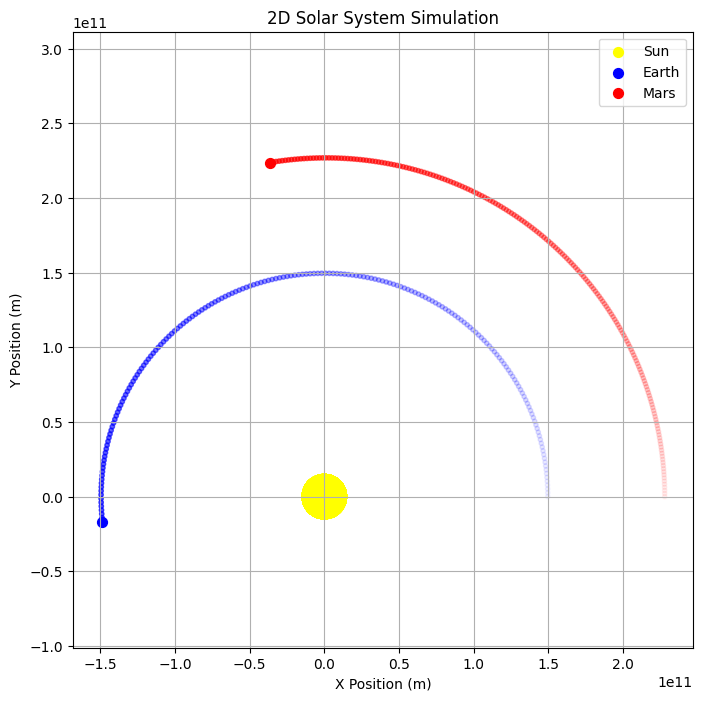

In [ ]:

def run_simulation():
    """
    Runs a small simulation of the solar system.
    """
    # Define the bodies in the simulation
    sun = Body(mass=1.989e30, position=np.array([0.0, 0.0]), velocity=np.array([0.0, 0.0]), name="Sun")
    earth = Body(mass=5.972e24, position=np.array([1.496e11, 0.0]), velocity=np.array([0.0, 29783.0]), name="Earth")
    mars = Body(mass=6.39e23, position=np.array([2.279e11, 0.0]), velocity=np.array([0.0, 24077.0]), name="Mars")
    #fictional_planet1 = Body(mass=1e25, position=np.array([-1e11, -1e11]), velocity=np.array([5000, 5000]), name="Fictional 1", is_fictional=True)
    #fictional_planet2 = Body(mass=5e24, position=np.array([3e11, -2e11]), velocity=np.array([1000, 8000]), name="Fictional 2", is_fictional=True)


    # Create the solar system
    solar_system = SolarSystem(bodies=[sun, earth, mars])#, fictional_planet1, fictional_planet2])

    # Simulation parameters
    dt = 3600 * 24  # 1 day in seconds
    years = 0.52
    time_steps = int(years * 365 * 24 * 3600 / dt)  # Number of steps 

    # Run the simulation
    for _ in range(time_steps):
        solar_system.update_system_rk4(dt)

    # Get the trajectories of the bodies
    trajectories = solar_system.get_body_trajectories()

    # Plot the trajectories
    plt.figure(figsize=(8, 8))
    plt.title("2D Solar System Simulation")
    plt.xlabel("X Position (m)")
    plt.ylabel("Y Position (m)")
    plt.grid(True)

    # Define some constants for plotting
    SOLAR_SYSTEM_PLANET_COLORS = {'Sun': 'yellow', 'Earth': 'blue', 'Mars': 'red'}  # Consistent colors for real planets
    MIN_MASS = min(body.mass for body in solar_system.bodies)
    MAX_MASS = max(body.mass for body in solar_system.bodies)
    MASS_SCALE_FACTOR = 1000  # Adjust for better visualization

    # Plot the trajectories for each body
    for i, trajectory in enumerate(trajectories):
        body = solar_system.bodies[i]
        x_coords = [pos[0] for pos in trajectory]
        y_coords = [pos[1] for pos in trajectory]

        # Determine color based on whether the body is fictional
        if body.is_fictional:
            color = np.random.rand(3)  # Random color for fictional planets
        else:
            color = SOLAR_SYSTEM_PLANET_COLORS.get(body.name, 'gray')  # Default to gray if not found

        # Calculate the size of the scatter point, scaling with mass
        size = (body.mass - MIN_MASS) / (MAX_MASS - MIN_MASS) * MASS_SCALE_FACTOR + 10  # Ensure size is at least 10

        # Calculate alpha values for each point in the trajectory, more recent = more opaque
        num_points = len(trajectory)
        alpha_values = np.linspace(0.05, 0.7, num_points)  # Alpha from 0.1 to 1

        #plt.plot(x_coords, y_coords, label=body.name, color=color, alpha=0.7) # added alpha to the line
        plt.scatter(x_coords, y_coords, c=[color] * num_points, s=[size] * num_points, alpha=alpha_values)  # Size varies, alpha varies
        plt.scatter(x_coords[-1], y_coords[-1], marker='o', s=50, color=color, label=f'{body.name}')  # Mark the starting position

    plt.legend()
    plt.axis('equal')  # Ensure equal aspect ratio for correct orbit shape
    plt.show()

if __name__ == "__main__":
    run_simulation()
